# 군집 (Clustering)
비지도 학습으로 비슷한 특성을 가지는 데이터들끼리 그룹으로 묶는다.

## 적용 예
- 비슷한 데이터들 분류
    - Feature를 바탕으로 비슷한 특징을 가진 데이터들을 묶어서 성향을 파악한다.
- 이상치 탐지
    - 모든 군집에 묶이지 않는 데이터는 이상치일 가능성이 높다
- 준지도학습
    - 레이블이 없는 데이터셋에 군집을 이용해 Label을 생성해 분류 지도학습을 할 수 있다. 또는 레이블을 좀더 세분화 할 수 있다.


## k-means (K-평균)
- 가장 널리 사용되는 군집 알고리즘 중 하나.
- 데이터셋을 K의 군집으로 나눈다. K는 하이퍼파라미터로 사용자가 지정한다.
- 군집의 중심이 될 것 같은 임의의 지점(Centroid)을 선택해 해당 중심에 가장 가까운 포인드들을 선택하는 기법.


### 알고리즘 이해
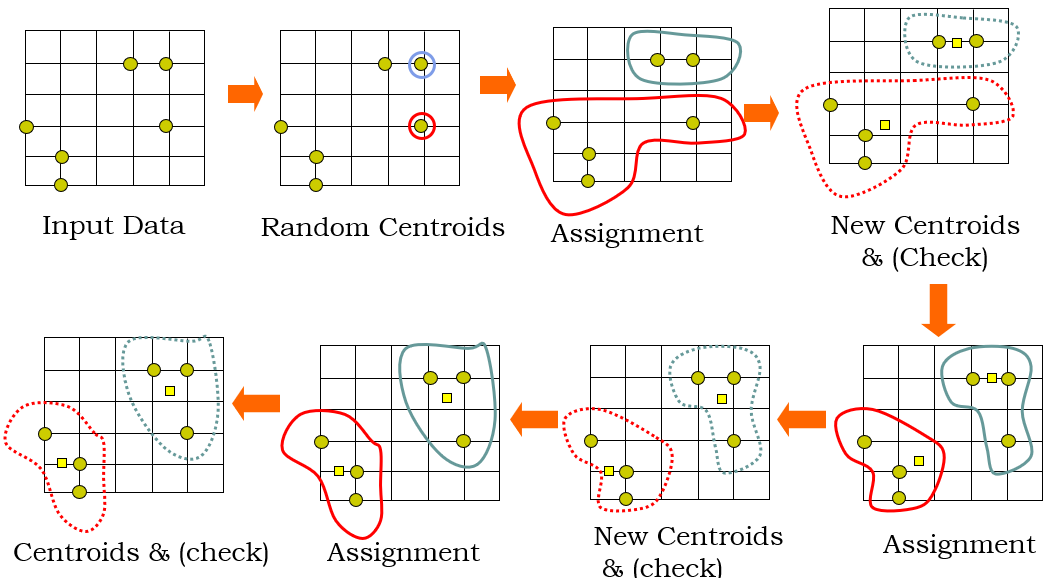

<center>출처 : http://ai-times.tistory.com/158</center>

### 특징
- K-means은 군집을 원 모양으로 간주 한다.
- 모든 특성은 동일한 Scale을 가져야 한다. 
    - Feature Scaling 필요
- 이상치에 취약하다.

### KMeans
- sklearn.cluster.KMeans
- 하이퍼파라미터
    - n_clusters: 몇개의 category로 분류할 지 지정.
- 속성
    - labels_ : 데이터포인트별 label

##### IRIS 데이터셋을 이용한 군집예제

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data['data']
y = data['target']

#####  데이터 전처리
- Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

###### KMeans 생성 및 학습

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled) 

###### 결과확인

In [ ]:
print(kmeans.labels_.shape)
cluster = kmeans.labels_
cluster

In [ ]:
df = pd.DataFrame(X, columns=data.feature_names)
df['cluster'] = cluster
df['y'] = y

In [ ]:
df.head()

In [ ]:
df["cluster"].value_counts()

##### 새로운 데이터를 분류

In [ ]:
new_data = [[4.1, 4.5, 1.7, 0.6],[6.7, 3.2, 5.3, 1.2]]

new_data_scaled = scaler.transform(new_data)

n_cluster = kmeans.predict(new_data_scaled)
n_cluster

## Inertia value(응집도) 를 이용한 적정 군집수 판단
- inertia 
    - 군집내 데이터들과 중심간의 거리의 합으로 군집의 응집도를 나타내는 값이다.
    - 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다
    - KMean의 inertia_ 속성으로 조회할 수 있다.
    - 군집 단위 별로 inertia 값을 조회한 후 급격히 떨어지는 지점이 적정 군집수라 판단 할 수 있다.

In [ ]:
kmeans.inertia_

In [ ]:
k_list = [2, 3, 4, 5, 6, 7]
inertias = []
for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

In [ ]:
inertias

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.plot(k_list, inertias)

plt.show()

# 군집 평가지표

## 실루엣 점수

- 실루엣 계수 (silhouette coefficient)
    - 개별 관측치가 해당 군집 내의 데이터와 얼마나 가깝고 가장 가까운 다른 군집과 얼마나 먼지를 나타내는 지표
    - -1 ~ 1 사이의 값을 가진다. 1에 가까울 수록 좋은 지표이다. 
        - `-1`에 가까우면 잘못된 그룹에 할당되어 있다는 의미
        - `0`에 가까우면 군집의 경계에 위치한다는 의미
        - `1`에 가까우면 자신이 속한 그룹의 센터에 가까이 있다는 의미

- **sklearn.metrics.silhouette_samples()**
    - 개별 관측치의 실루엣 계수 반환
- **sklearn.metrics.silhouette_score()**
    - 실루엣 계수들을의 평균
- 좋은 군집화의 지표
    - 실루엣 계수 평균이 1에 가까울수록 좋다.
    - 실루엣 계수 평균과 개별 군집의 실루엣 계수 평균의 편차가 크지 않아야 한다.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
silhouette_coef = silhouette_samples(X_scaled, cluster)
silhouette_coef

In [ ]:
score = silhouette_score(X_scaled, cluster)
score

In [ ]:
np.mean(silhouette_coef)

In [ ]:
df['silhouette_coef'] = silhouette_coef
df.head()

In [ ]:
df.iloc[40:60]